In [61]:
import torch
from torchvision.models import resnet50, ResNet50_Weights, list_models
from torchvision import models, transforms
from PIL import Image
import numpy as np
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [17]:
def show_img(PIL_IMG):
    plt.imshow(np.asarray(PIL_IMG))

In [53]:
# Load model and image
model = torch.load('../pokemon_digimon_classifier/final_model.pt').to("cuda")

for param in model.parameters():
    param.requires_grad = False

In [14]:
weights = ResNet50_Weights.IMAGENET1K_V1
preprocess = weights.transforms()

In [48]:
def load_and_convert_image(file_path):
    # Load the image with transparency using PIL
    img = Image.open(file_path)

    # Check if the image has an alpha channel
    if img.mode == 'RGBA':
        # Create a white background
        new_img = Image.new("RGB", img.size, (255, 255, 255))

        # Paste the image onto the white background, using the alpha channel as a mask
        new_img.paste(img, (0, 0), img)

        # Convert the image to a NumPy array
        rgb_image = np.array(new_img)
    else:
        # If the image doesn't have an alpha channel, just convert it to a NumPy array
        rgb_image = np.array(img)
    
    if rgb_image.shape[2] == 3:
        return  ToTensor()(rgb_image)
    else:
        print('error loading', file_path)
        return None

In [49]:
img = load_and_convert_image("../pokemon_digimon_classifier/pokemon_or_digimon_data/pokemon/778 Mimikyu.png")

In [58]:
# preprocess the image
X = preprocess(img).unsqueeze(0).to("cuda").requires_grad_()

# we would run the model in evaluation mode
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [59]:
scores = model(X)

score_max_index = scores.argmax()
score_max = scores[0,score_max_index]

score_max.backward()

In [67]:
saliency, _ = torch.max(X.grad.data.abs(),dim=1)

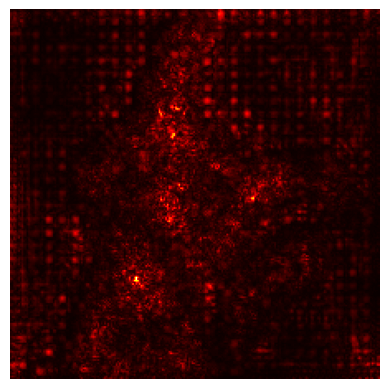

In [68]:
# code to plot the saliency map as a heatmap
plt.imshow(saliency[0].cpu(), cmap=plt.cm.hot)
plt.axis('off')
plt.show()

In [70]:
saliency = X.grad.data.abs().squeeze()